In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm

Assessor Sales Data Preprocessing

Link to Dataset: https://datacatalog.cookcountyil.gov/Property-Taxation/Assessor-Archived-05-11-2022-Residential-Sales-Dat/5pge-nu6u

In [82]:
assessor_dir = 'LeadWater/datasets/assessorSequential.csv' 
df = pd.read_csv(assessor_dir)
# assessor_df = assessor_df_cleaned(assessor_df)

In [83]:
df.drop(columns=['Unnamed: 0', 'PIN','Township Code','Neighborhood Code','Tract Median Income','Age','ZIP','Longitude','Latitude'], inplace=True)

In [84]:
df.head(5)

,Date.Sampled,Address,X1st.Draw,X2nd.Draw,X3rd.Draw,X4th.Draw,X5th.Draw,X6th.Draw,X7th.Draw,X8th.Draw,X9th.Draw,X10th.Draw,X11th.Draw,Sale Price
0,9/4/2019,100XX S BELL AVE,1.52,1.37,1.59,2.53,2.44,1.90,2.45,2.92,3.75,3.86,4.35,280000.0
1,7/16/2016,100XX S CALHOUN AVE,3.70,2.62,8.83,13.80,13.20,13.60,12.30,11.80,10.80,8.01,2.75,NaN
2,12/17/2019,100XX S CALUMET AVE,4.02,5.35,6.97,6.55,17.70,16.60,12.10,11.60,12.00,11.10,8.72,NaN
3,12/14/2019,100XX S CARPENTER ST,9.54,7.31,6.95,5.63,4.91,7.15,12.40,13.10,10.10,9.54,7.23,NaN
4,7/14/2021,100XX S CARPENTER ST,14.00,11.00,8.83,8.12,8.69,7.14,11.00,7.51,8.50,8.01,NaN,NaN


Lead Water Concentration Data Preprocessing

In [85]:
df[~df.isin(['NaN']).any(axis=1)]
df.shape
df.dropna(inplace=True)
df.shape

(125, 14)

In [86]:
df.head(5)

,Date.Sampled,Address,X1st.Draw,X2nd.Draw,X3rd.Draw,X4th.Draw,X5th.Draw,X6th.Draw,X7th.Draw,X8th.Draw,X9th.Draw,X10th.Draw,X11th.Draw,Sale Price
0,9/4/2019,100XX S BELL AVE,1.52,1.37,1.59,2.53,2.44,1.90,2.45,2.92,3.75,3.86,4.35,280000.0
17,12/20/2016,102XX S ARTESIAN AVE,4.62,4.92,6.12,6.08,5.76,5.28,4.81,4.85,4.86,4.62,1.26,219000.0
20,9/17/2019,102XX S OGLESBY AVE,9.70,25.60,41.50,42.10,36.20,31.20,26.00,23.70,20.30,16.20,4.85,147400.0
21,9/28/2016,103XX S HAMILTON AVE,1.24,3.35,3.23,6.19,6.78,6.57,8.94,9.38,8.98,8.49,8.88,330000.0
36,10/10/2019,105XX S CENTRAL PARK AVE,4.35,3.59,3.55,3.60,8.56,15.50,18.70,18.00,15.00,14.20,1.70,280000.0


In [62]:
col_name = df.columns[2:13]
col_name
df['Median Lead Draw'] = df[col_name].median(axis=1)

In [63]:
df.head(5)

,Date.Sampled,Address,X1st.Draw,X2nd.Draw,X3rd.Draw,X4th.Draw,X5th.Draw,X6th.Draw,X7th.Draw,X8th.Draw,X9th.Draw,X10th.Draw,X11th.Draw,Sale Price,Median Lead Draw
0,9/4/2019,100XX S BELL AVE,1.52,1.37,1.59,2.53,2.44,1.90,2.45,2.92,3.75,3.86,4.35,280000.0,2.45
17,12/20/2016,102XX S ARTESIAN AVE,4.62,4.92,6.12,6.08,5.76,5.28,4.81,4.85,4.86,4.62,1.26,219000.0,4.86
20,9/17/2019,102XX S OGLESBY AVE,9.70,25.60,41.50,42.10,36.20,31.20,26.00,23.70,20.30,16.20,4.85,147400.0,25.60
21,9/28/2016,103XX S HAMILTON AVE,1.24,3.35,3.23,6.19,6.78,6.57,8.94,9.38,8.98,8.49,8.88,330000.0,6.78
36,10/10/2019,105XX S CENTRAL PARK AVE,4.35,3.59,3.55,3.60,8.56,15.50,18.70,18.00,15.00,14.20,1.70,280000.0,8.56


In [64]:
df = df.drop(columns=df.columns[2:13])
df.head(5)

,Date.Sampled,Address,Sale Price,Median Lead Draw
0,9/4/2019,100XX S BELL AVE,280000.0,2.45
17,12/20/2016,102XX S ARTESIAN AVE,219000.0,4.86
20,9/17/2019,102XX S OGLESBY AVE,147400.0,25.60
21,9/28/2016,103XX S HAMILTON AVE,330000.0,6.78
36,10/10/2019,105XX S CENTRAL PARK AVE,280000.0,8.56


In [65]:
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


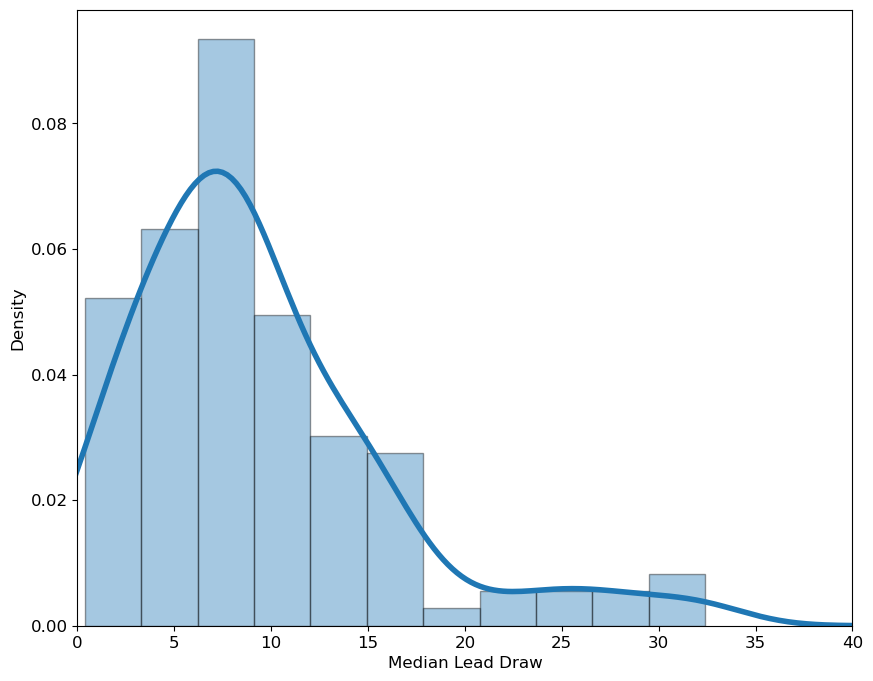

In [66]:
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['font.size'] = 12


sns.distplot(df['Median Lead Draw'], hist=True, kde=True,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim(0, 40)
plt.show()

In [67]:
import datetime as dt

In [68]:
df_year = df[['Date.Sampled','Sale Price', 'Median Lead Draw']]

In [69]:
q33 = df_year['Sale Price'].quantile(0.33)
q66 = df_year['Sale Price'].quantile(0.66)

In [70]:
df_low = df_year.drop(df_year[df_year['Sale Price'] > q33].index)
med_low = df_low['Median Lead Draw'].tolist()

In [71]:
df_mid = df_year.drop(df_year[df_year['Sale Price'] <= q33].index)
med_mid = df_mid['Median Lead Draw'].tolist()

In [72]:
df_mid.drop(df_mid[df_mid['Sale Price'] > q66].index,inplace=True)

In [73]:
df_high = df_year.drop(df_year[df_year['Sale Price'] <= q66].index)
med_high = df_high['Median Lead Draw'].tolist()

In [74]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [75]:
print('ANOVA: low vs mid vs high Sale Price: p-value=', f_oneway(med_low, med_mid, med_high)[1])

ANOVA: low vs mid vs high Sale Price: p-value= 0.7337351437278643


In [76]:
print('T-test: low vs high Sales: p-value=', ttest_ind(med_low, med_high, random_state=232)[1])
print('T-test: low vs mid Sales: p-value=', ttest_ind(med_low, med_mid, random_state=232)[1])
print('T-test: med vs high Sales: p-value=', ttest_ind(med_mid, med_high, random_state=232)[1])

T-test: low vs high Sales: p-value= 0.467715793479597
T-test: low vs mid Sales: p-value= 0.7934638325613391
T-test: med vs high Sales: p-value= 0.5370994208660924


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

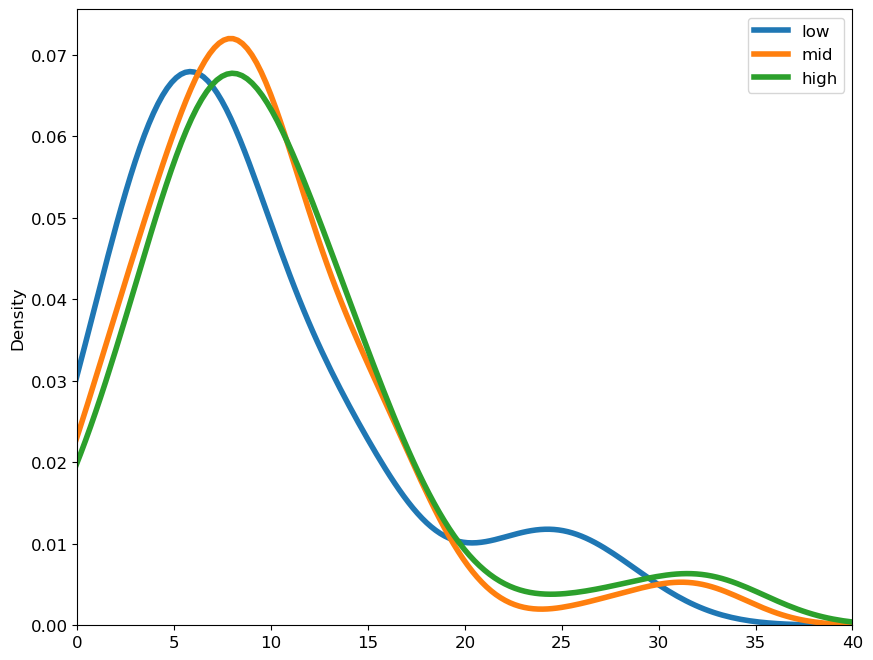

In [79]:
#t test distribution
sns.distplot(med_low, hist=False, kde=True,
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4})
sns.distplot(med_mid, hist=False, kde=True,
                hist_kws={'edgecolor':'black'}, 
                kde_kws={'linewidth': 4})
sns.distplot(med_high, hist=False, kde=True,
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4})
plt.xlim(0, 40)
#legend
plt.legend(['low', 'mid', 'high'])
plt.show()


In [80]:
#Descriptive Statistics
df_year.describe()


,Sale Price,Median Lead Draw
count,1.250000e+02,125.000000
mean,4.108050e+05,9.284720
std,2.991434e+05,6.656478
min,2.000000e+04,0.380000
25%,2.200000e+05,4.660000
50%,3.330000e+05,8.200000
75%,5.050000e+05,12.000000
max,1.975000e+06,32.400000
